# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    #print(action)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [26]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# Vanilla DQN

Directly using the code from dqn_agent in the code exercise. The only difference is the model here uses three hidden layer with 128 units in each layer.

In [9]:
from dqn_agent import Agent

agentV = Agent(state_size=state_size, action_size=action_size, seed=0)

In [6]:
def dqn(n_episodes=2500, max_t=5000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    global agentV
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    best_eps, best_score = 0, 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agentV.act(state, eps)
            #print(action)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]   
            agentV.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=14.5:
            if np.mean(scores_window) > best_score:
                best_score = np.mean(scores_window)
                best_eps = i_episode
                best_agentV = agentV
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                torch.save(agentV.qnetwork_local.state_dict(), 'model.pth')
        if (best_eps!=0) and (i_episode - best_eps > 50):
            print('\nTolerence of no improvement achieved. Recalling the agent in {:d} episode!'.format(best_eps))                
            agentV.qnetwork_local.load_state_dict(torch.load('model.pth'))
            break
    return scores

scores = dqn()


Episode 100	Average Score: 0.94
Episode 200	Average Score: 3.57
Episode 300	Average Score: 6.98
Episode 400	Average Score: 10.47
Episode 500	Average Score: 12.44
Episode 600	Average Score: 13.48
Episode 700	Average Score: 14.16
Episode 800	Average Score: 13.85
Episode 900	Average Score: 13.28
Episode 1000	Average Score: 13.84
Episode 1100	Average Score: 13.81
Episode 1167	Average Score: 14.52
Environment solved in 1067 episodes!	Average Score: 14.52
Episode 1171	Average Score: 14.53
Environment solved in 1071 episodes!	Average Score: 14.53
Episode 1172	Average Score: 14.69
Environment solved in 1072 episodes!	Average Score: 14.69
Episode 1173	Average Score: 14.77
Environment solved in 1073 episodes!	Average Score: 14.77
Episode 1175	Average Score: 14.81
Environment solved in 1075 episodes!	Average Score: 14.81
Episode 1177	Average Score: 14.86
Environment solved in 1077 episodes!	Average Score: 14.86
Episode 1178	Average Score: 14.92
Environment solved in 1078 episodes!	Average Score: 

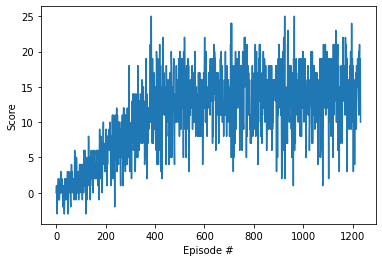

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
test_score = np.zeros(100)
for i in range(100):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agentV.act(state)                      # select an action
        #print(action)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    test_score[i] = score
    if (i+1) % 10 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i+1, np.mean(test_score[:i+1])))
print("Average Test Score over 100 Episodes: {}".format(np.mean(test_score)))

Episode 10	Average Score: 15.30
Episode 20	Average Score: 14.85
Episode 30	Average Score: 14.63
Episode 40	Average Score: 14.25
Episode 50	Average Score: 14.14
Episode 60	Average Score: 14.50
Episode 70	Average Score: 14.49
Episode 80	Average Score: 14.25
Episode 90	Average Score: 14.39
Episode 100	Average Score: 14.47
Average Test Score over 100 Episodes: 14.47


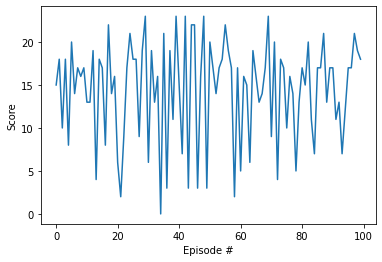

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(100), test_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Dueling DQN

In [5]:
from duel_dqn_agent import Agent

agentD = Agent(state_size=state_size, action_size=action_size, seed=0)

In [8]:
def duel_dqn(n_episodes=2500, max_t=5000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    global agentD
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    best_eps, best_score = 0, 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agentD.act(state, eps)
            #print(action)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]   
            agentD.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=14.75:
            if np.mean(scores_window) > best_score:
                best_score = np.mean(scores_window)
                best_eps = i_episode
                best_agentD = agentD
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                torch.save(agentD.qnetwork_local.state_dict(), 'DuelDQN_128x2FC_128FC.pth')
            
        if (best_eps!=0) and (i_episode - best_eps > 50):
            print('\nTolerence of no improvement achieved. Recalling the agent in {:d} episode!'.format(best_eps))                
            agentD.qnetwork_local.load_state_dict(torch.load('DuelDQN_128x2FC_128FC.pth'))
            break
    
    if i_episode == n_episode:
        agentD.qnetwork_local.load_state_dict(torch.load('DuelDQN_128x2FC_128FC.pth'))
    return scores


scores = duel_dqn()


Episode 100	Average Score: 0.63
Episode 200	Average Score: 3.97
Episode 300	Average Score: 7.44
Episode 400	Average Score: 10.82
Episode 500	Average Score: 13.81
Episode 600	Average Score: 14.54
Episode 653	Average Score: 14.78
Environment solved in 553 episodes!	Average Score: 14.78
Episode 654	Average Score: 14.79
Environment solved in 554 episodes!	Average Score: 14.79
Episode 655	Average Score: 14.83
Environment solved in 555 episodes!	Average Score: 14.83
Episode 657	Average Score: 14.86
Environment solved in 557 episodes!	Average Score: 14.86
Episode 658	Average Score: 14.87
Environment solved in 558 episodes!	Average Score: 14.87
Episode 659	Average Score: 14.97
Environment solved in 559 episodes!	Average Score: 14.97
Episode 700	Average Score: 14.73
Episode 710	Average Score: 14.81
Tolerence of no improvement achieved. Recalling the agent in 659 episode!


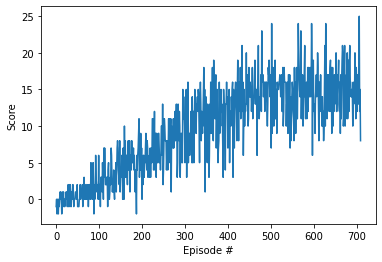

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
test_score = np.zeros(100)
for i in range(100):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agentD.act(state)                     # select an action
        #print(action)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    test_score[i] = score
    if (i+1) % 10 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i+1, np.mean(test_score[:i+1])))
print("Average Test Score over 100 Episodes: {}".format(np.mean(test_score)))

Episode 10	Average Score: 9.30
Episode 20	Average Score: 11.50
Episode 30	Average Score: 11.77
Episode 40	Average Score: 11.40
Episode 50	Average Score: 12.22
Episode 60	Average Score: 12.42
Episode 70	Average Score: 12.53
Episode 80	Average Score: 12.56
Episode 90	Average Score: 12.54
Episode 100	Average Score: 12.36
Average Test Score over 100 Episodes: 12.36


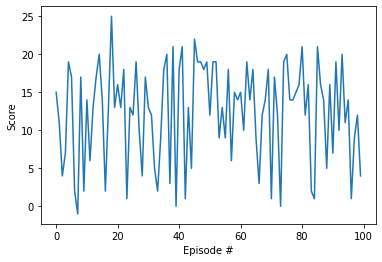

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(100), test_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Prioritized Experience Replay DQN

In [5]:
from replay_dqn_agent import Agent
agentPER = Agent(state_size=state_size, action_size=action_size)

In [ ]:
def PERdqn(n_episodes=20000, max_t=5000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    global agentPER
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    beta_start = 0.4                   # initialize beta across episodes
    beta_frames = 2000 
    beta_by_frame = lambda frame_idx: min(1.0, beta_start + frame_idx * (1.0 - beta_start) / beta_frames)
    
    best_eps, best_score = 0, 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            beta = beta_by_frame(t+1)
            action = agentPER.act(state, eps)
            #print(action)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]   
            agentPER.step(state, action, reward, next_state, done, beta)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.:
            if np.mean(scores_window) > best_score:
                best_score = np.mean(scores_window)
                best_eps = i_episode
                best_agentPER = agentPER
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                torch.save(agentPER.qnetwork_local.state_dict(), 'PERDQN_128x3FC.pth')
        if (best_eps!=0) and (i_episode - best_eps > 50):
            print('\nTolerence of no improvement achieved. Recalling the agent in {:d} episode!'.format(best_eps))                
            agentPER.qnetwork_local.load_state_dict(torch.load('PERDQN_128x3FC.pth'))
            break
            
    if i_episode == n_episodes:
        agentPER = best_agentPER
        torch.save(agentPER.qnetwork_local.state_dict(), 'PERDQN_128x3FC.pth')
    return scores

scores = PERdqn()

In [9]:
torch.save(agentPER.qnetwork_local.state_dict(), 'PERDQN_128x3FC.pth')

In [10]:
test_score = np.zeros(100)
for i in range(100):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agentPER.act(state)                     # select an action
        #print(action)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    test_score[i] = score
    if (i+1) % 10 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i+1, np.mean(test_score[:i+1])))
print("Average Test Score over 100 Episodes: {}".format(np.mean(test_score)))

Episode 10	Average Score: 9.20
Episode 20	Average Score: 8.45
Episode 30	Average Score: 8.07
Episode 40	Average Score: 8.47
Episode 50	Average Score: 8.36
Episode 60	Average Score: 8.13
Episode 70	Average Score: 8.10
Episode 80	Average Score: 8.11
Episode 90	Average Score: 8.31
Episode 100	Average Score: 8.10
Average Test Score over 100 Episodes: 8.1


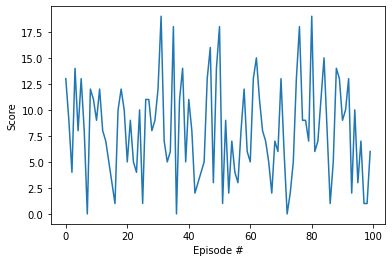

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(100), test_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()